# Lab 1 Script

**Name:** Ryan Baig

**Due:** Sunday, 3/9

### Part 1
---

In [6]:
#1: Define the function for the gravitational potential

import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-11

def grav_potential(M, xm, ym, x, y):
    r = np.sqrt((x-xm)**2 + (y-ym)**2)
    if r == 0:
        return np.nan
    else:
        return -(G*M)/r


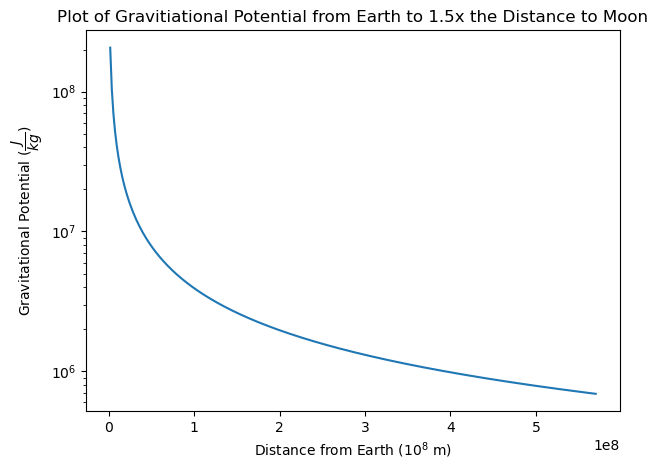

In [64]:
#2: 1D plot of abs value of potential as function of x

fig, ax = plt.subplots()

def abs_potential(X):
    return np.abs(grav_potential(5.9e24, 0, 0, X, 0))

vabs = np.vectorize(abs_potential)

em_dist = 3.8e8

X_gp = np.linspace(0,(1.5*em_dist),300)
Pot = vabs(X_gp)

ax.plot(X_gp, Pot)

ax.set_yscale("log")
ax.set_xlabel(r"Distance from Earth ($10^8$ m)")
ax.set_ylabel(r"Gravitational Potential ($\dfrac{J}{kg}$)")
ax.set_title("Plot of Gravitiational Potential from Earth to 1.5x the Distance to Moon")
plt.tight_layout()



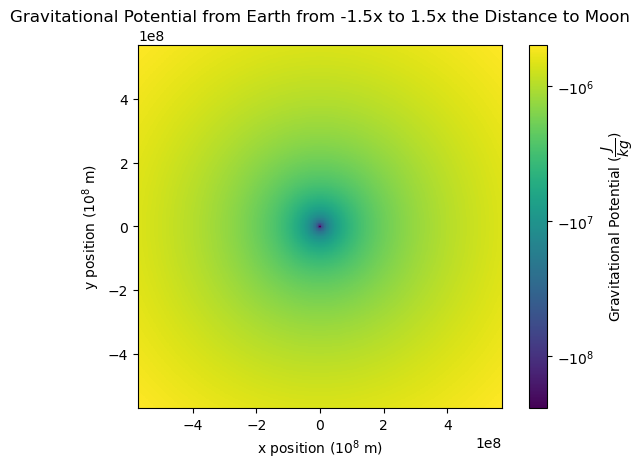

In [65]:
#3: 2D color-mesh plot of potential with Earth at origin

import matplotlib.colors as colors

x_vals = np.linspace(-1.5*em_dist, 1.5*em_dist, 500)
y_vals = x_vals.copy()

x_grid, y_grid = np.meshgrid(x_vals, y_vals)

def potential(_x,_y):
    return grav_potential(5.9e24, 0, 0, _x, _y)

vpotential = np.vectorize(potential)

pot_2d = vpotential(x_grid, y_grid)

fig, ax1 = plt.subplots(1,1)
mesh = ax1.pcolormesh(x_grid,y_grid,pot_2d, norm = colors.SymLogNorm(linthresh= 0.03, linscale= 0.03, vmin = pot_2d.min(), vmax= pot_2d.max())) #used matplotlib.colors to get logorithmic color gradient

ax1.set_aspect("equal")
cbar = fig.colorbar(mesh)
ax1.set_xlabel(r"x position ($10^8$ m)")
ax1.set_ylabel(r"y position ($10^8$ m)")
ax1.set_title("Gravitational Potential from Earth from -1.5x to 1.5x the Distance to Moon")
cbar.set_label(r"Gravitational Potential ($\dfrac{J}{kg}$)")

plt.tight_layout()


### Part 2
---

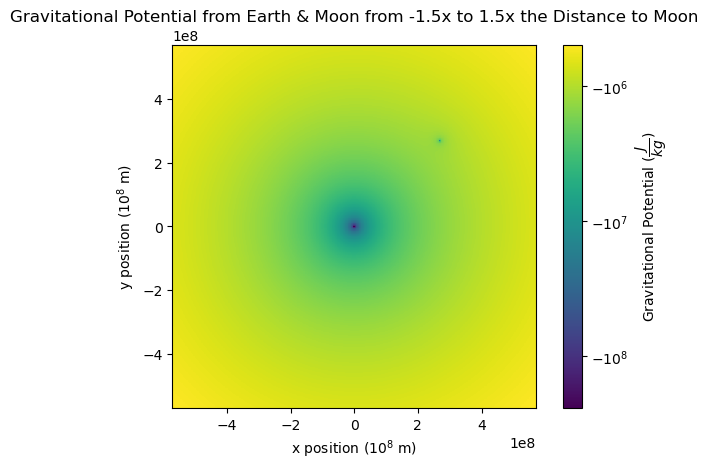

In [70]:
#1: Making 2D color-mesh plot of combined Earth-Moon system from -1.5 to 1.5 times the Earth-Moon distance

moon_dist = (em_dist/np.sqrt(2))

def comb_potential(x_,y_):
     return grav_potential(5.9e24, 0, 0, x_, y_) + grav_potential(7.3e22, moon_dist, moon_dist, x_, y_)

vcombpot = np.vectorize(comb_potential)

combpot_2d = vcombpot(x_grid,y_grid)

fig, ax2 = plt.subplots(1,1)

mesh2 = ax2.pcolormesh(x_grid,y_grid,combpot_2d, norm = colors.SymLogNorm(linthresh= 0.03, linscale= 0.03, vmin = combpot_2d.min(), vmax= combpot_2d.max()))

ax2.set_aspect('equal')
cbar2 = fig.colorbar(mesh2)

ax2.set_xlabel(r"x position ($10^8$ m)")
ax2.set_ylabel(r"y position ($10^8$ m)")
ax2.set_title("Gravitational Potential from Earth & Moon from -1.5x to 1.5x the Distance to Moon")
cbar2.set_label(r"Gravitational Potential ($\dfrac{J}{kg}$)")

plt.tight_layout()

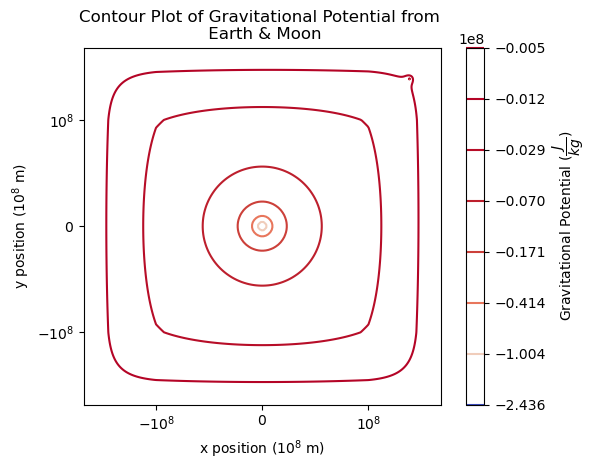

In [204]:
#2: 2D cotour plot of the same thing

import matplotlib.cm as cm

fig, ax_cont = plt.subplots(1,1)

a = np.abs(combpot_2d.min())
b = np.abs(combpot_2d.max())
num_levels = 8
lvl = -np.logspace(np.log10(a), np.log10(b), num_levels)

contour1 = ax_cont.contour(x_grid, y_grid, combpot_2d, np.log10(np.abs(combpot_2d)), levels=lvl, cmap="coolwarm" )
ax_cont.set_aspect("equal")

cbar3=fig.colorbar(contour1)

ax_cont.set_xscale("symlog", linthresh=1e8)
ax_cont.set_yscale("symlog", linthresh=1e8)
ax_cont.set_xlabel(r"x position ($10^8$ m)")
ax_cont.set_ylabel(r"y position ($10^8$ m)")
ax_cont.set_title("Contour Plot of Gravitational Potential from \n Earth & Moon")
cbar3.set_label(r"Gravitational Potential ($\dfrac{J}{kg}$)")

plt.tight_layout()

### Part 3
---

Given equation:
$$
\vec{F}_{21} = -G\frac{M_1m_2}{|r_{21}|^2}\hat{r_{21}}
$$

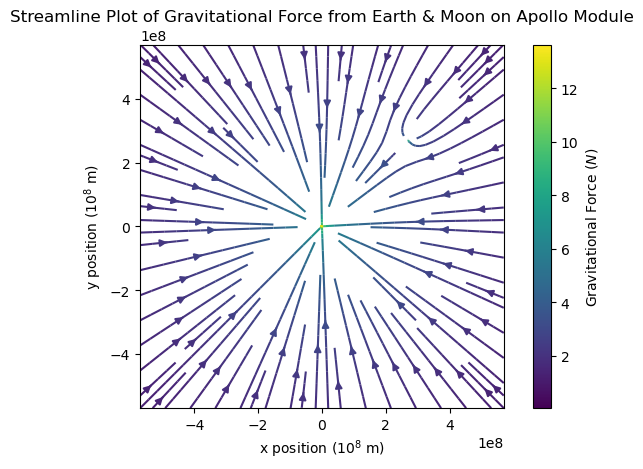

In [171]:
#1 & 2: Create function that takes M, m, x1, y1, x2, y2, and returns Fx and Fy and create streamplot of gravitational force on Apollo module by Earth & Moon

fig, ax3 = plt.subplots(1,1)

#building the grid
ny = 500
nx = 500
y = np.linspace(-1.5*em_dist,1.5*em_dist,ny)
x = y.copy()
x_grid1, y_grid1 = np.meshgrid(x,y)

#build container to hold Gravitational Field

Fx = np.zeros((ny,nx))
Fy = np.zeros((ny,nx))

def FGrav(M, m, x1, y1, x2, y2):
    if np.isclose(x1,x2) and np.isclose(y1,y2):
        fx = np.nan
        fy = np.nan
    else:
        r_squared = np.sqrt((x2-x1)**2 + (y2-y1)**2)**2
        vec_r = np.array([x2-x1,y2-y1])
        vec_r_hat = vec_r / np.linalg.norm(vec_r)
        fx = ((-G*M*m)/(abs(r_squared)))*vec_r_hat[0] #x-component
        fy = ((-G*M*m)/(abs(r_squared)))*vec_r_hat[1] #y-component
    return fx, fy


# fill containers
M_e = 5.9e24
M_moon = 7.3e22
m_apollo = 5500
for y in range(ny):  #vist all y points (all *rows*)
    for x in range(nx):  #visit all x points (all *columns*)

        #Calculate gravitational force due to Earth
        f_e_x, f_e_y = FGrav(M_e, m_apollo, 0, 0, x_grid1[y,x], y_grid1[y,x])

        #Calculate gravitational force due to Moon
        f_m_x, f_m_y = FGrav(M_moon, m_apollo, moon_dist, moon_dist, x_grid1[y,x], y_grid1[y,x])

        #Update container
        Fx[y,x] += (f_e_x + f_m_x)
        Fy[y,x] += (f_e_y + f_m_y)
        
colors = np.log(np.hypot(Fx, Fy))
stream = ax3.streamplot (x_grid1, y_grid1, Fx, Fy, color=colors)

cbar4 = fig.colorbar(stream.lines)
ax3.set_aspect("equal")

ax3.set_xlabel(r"x position ($10^8$ m)")
ax3.set_ylabel(r"y position ($10^8$ m)")
ax3.set_title("Streamline Plot of Gravitational Force from Earth & Moon on Apollo Module")
cbar4.set_label(r"Gravitational Force ($N$)")

plt.tight_layout()

### Part 4
---

In [177]:
#1: calculate T from equation (5) from the Lab instructionsa

m_0 = 2.8e6
m_dot = 1.3e4
m_f = 7.5e5

T = (m_0-m_f) / m_dot
print(T) #Burn time in seconds

157.69230769230768


In [202]:
#2: Define equation (3) and solve for given variables

v_e = 2.3e3
g = 9.81 

def m(t):
    return m_0 - (m_dot*t)

def deltv(t):
    if m(t) <= 0:
        return 0
    else:
        return v_e*np.log(m_0/m(t))-g*t 

#chv = deltv()     -> Checked to see if function works properly (it does!)
#print(chv)

0


In [203]:
#3: Compute eqaution (4): altitude of rocket at end of burna

from scipy.integrate import quad

h, h_err = quad(deltv, 0, T)

print(h) #altitude of rocket at end of burn, in meters.


65924.5656507771
